In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df = pd.read_csv("https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv")
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5106,3378900020,20141023T000000,422500.0,3,1.75,1560,7245,1.5,0,0,...,7,1560,0,1962,1985,98052,47.6868,-122.119,2220,8502
15847,9547205610,20140929T000000,719000.0,4,2.75,2210,3400,1.5,0,0,...,7,1470,740,1926,0,98115,47.6826,-122.311,1500,3400
5994,7625703637,20140828T000000,286000.0,2,1.00,610,4000,1.0,0,0,...,6,610,0,1918,0,98136,47.5469,-122.391,870,5160
9801,7811220070,20140910T000000,490000.0,3,1.75,1510,11120,1.0,0,0,...,8,1510,0,1984,0,98005,47.5931,-122.158,2660,10800
3314,3438500714,20140506T000000,325000.0,4,2.50,1890,6156,1.0,0,0,...,7,980,910,1980,0,98106,47.5510,-122.356,1590,6954


In [251]:
df['bathrooms'] = df['bathrooms'].round().astype(int)
df['floors'] = df['floors'].round().astype(int)

In [253]:
np.random.seed(42)

for i in ['sqft_lot', 'bathrooms']:
    missing = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
    df.loc[missing, i] = np.nan

print(df[['sqft_lot', 'bathrooms']].isnull().sum())

sqft_lot     1080
bathrooms    1080
dtype: int64


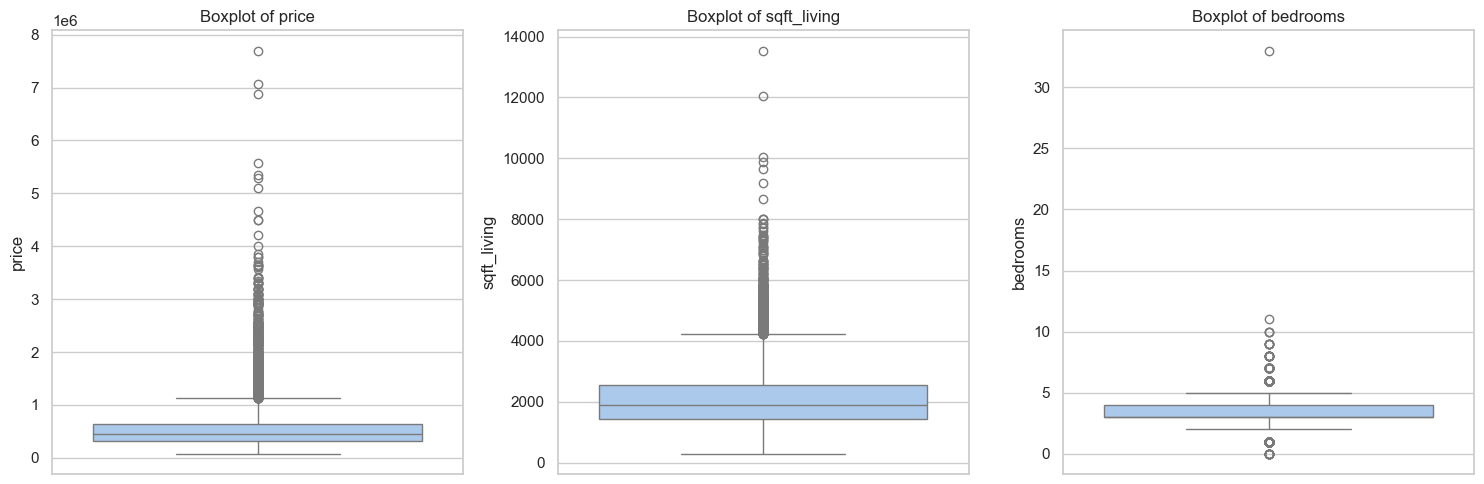

In [256]:
j2 = ['price', 'sqft_living', 'bedrooms']

plt.figure(figsize=(15, 5))

for i, j in enumerate(j2, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(df[j])
    plt.title(f"Boxplot of {j}")
    plt.ylabel(j)

plt.tight_layout()
plt.show()

In [257]:
def remove_outliers(df, i):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    return df[(df[i] >= lower) & (df[i] <= upper)]
    
df1 = df.copy()
for i in j2:
    df1 = remove_outliers(df1, i)

print("Shape before:", df.shape)
print("Shape after :", df1.shape)

Shape before: (21613, 21)
Shape after : (19687, 21)


In [260]:
df['date'] = pd.to_datetime(df['date'])
df[['date']].sample(5)

,date
8579,2014-10-02
16485,2014-06-19
13399,2015-03-27
4563,2014-06-30
15374,2015-01-26


In [262]:
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['house_age'] = df['sale_year'] - df['yr_built']
df['was_renovated'] = (df['yr_renovated'] !=0).astype(int)
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated
7453,7809200005,2014-12-16,292000.0,3,2.0,1650,14633.0,1,0,0,...,0,98056,47.4984,-122.176,1370,12495,2014,12,56,0
11497,3260200200,2014-10-30,580000.0,3,2.0,1670,NaN,1,0,0,...,0,98005,47.6028,-122.172,1710,7416,2014,10,40,0
9781,7852110070,2014-06-08,567500.0,3,2.0,2300,7398.0,2,0,0,...,0,98065,47.5369,-121.876,2580,6983,2014,6,13,0
2206,4399200075,2014-07-03,250000.0,3,2.0,1770,8868.0,1,0,0,...,0,98002,47.3188,-122.212,1630,9706,2014,7,55,0
19465,6431000206,2014-05-08,835000.0,4,2.0,1910,6960.0,2,0,0,...,0,98103,47.6893,-122.348,1360,3300,2014,5,73,0


In [264]:
df['age_since_renovated'] = np.where(
    df['yr_renovated'] != 0,
    df['sale_year'] - df['yr_renovated'],
    df['house_age']
)
df['sqft_living_per_floor'] = np.where(
    df['floors'] != 0,
    df['sqft_living']/df['floors'],
    np.nan
)
df['bath_per_bed'] = np.where(
    df['bedrooms'] != 0,
    df['bathrooms']/df['bedrooms'],
    np.nan
)
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovated,sqft_living_per_floor,bath_per_bed
10136,1862400226,2015-03-11,505000.0,2,1.0,1070,8130.0,1,0,0,...,-122.370,1360,7653,2015,3,73,0,73,1070.0,0.500000
20081,889000015,2014-11-03,599000.0,3,2.0,1650,1180.0,3,0,0,...,-122.319,1650,1960,2014,11,0,0,0,550.0,0.666667
227,7972000200,2014-05-29,264950.0,4,2.0,1720,9753.0,1,0,0,...,-122.371,1510,9753,2014,5,36,0,36,1720.0,0.500000
20017,1025039168,2014-09-23,290000.0,1,NaN,740,1284.0,1,0,0,...,-122.406,1430,3988,2014,9,86,0,86,740.0,NaN
5769,9197800010,2014-10-17,1460000.0,4,4.0,4200,14353.0,2,0,2,...,-122.217,3750,16316,2014,10,18,0,18,2100.0,1.000000


## Task-2

In [267]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [269]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

n_features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "sqft_above", "sqft_basement", "lat", "long",
    "sqft_living15", "sqft_lot15", "house_age",
    "sqft_living_per_floor", "bath_per_bed"
]

c_features = ["zipcode", "waterfront", "view"]

p_features = ["grade", "condition", "was_renovated", "sale_year", "sale_month"]

n_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())                     
])

c_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("n", n_pipeline, n_features),
        ("c", c_pipeline, c_features),
        ("p", "passthrough", p_features)
    ],
    remainder='drop'
)

## Task-3

In [ ]:
# !pip install xgboost

In [272]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [274]:
pipelines = {
    "RandomForest": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=42))
    ]),
    
    "GradientBoosting": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", GradientBoostingRegressor(random_state=42))
    ]),
    
    "XGBoost": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor(random_state=42, verbosity=0))
    ])
}

In [276]:
param_grids = {
    "RandomForest": {
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [10, 20]
    },
    "GradientBoosting": {
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [3, 5]
    },
    "XGBoost": {
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [3, 5]
    }
}

In [280]:
best_models = {}

for name, pipeline in pipelines.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=3,
        scoring="r2",
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best score (CV RMSE): {-grid.best_score_:.2f}") # galti se - use karr liya hai phir se run karunga to 30 mins lagti hai
    
    best_models[name] = grid.best_estimator_


Tuning RandomForest...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params for RandomForest: {'regressor__max_depth': 20, 'regressor__n_estimators': 200}
Best score (CV RMSE): -0.87

Tuning GradientBoosting...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params for GradientBoosting: {'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best score (CV RMSE): -0.90

Tuning XGBoost...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params for XGBoost: {'regressor__max_depth': 3, 'regressor__n_estimators': 200}
Best score (CV RMSE): -0.89


## Task-4

In [282]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

best_model_name = max(best_models, key=lambda name: best_models[name].score(X_test, y_test))
best_pipeline = best_models[best_model_name]

y_pred = best_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Best Model: {best_model_name}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Best Model: GradientBoosting
R² Score: 0.8694
MAE: 70267.76
RMSE: 140496.25



Performance Comparison:
                 Model           RMSE
0  Original Best Model  135000.000000
1       Tuned Pipeline  143695.593008

Percentage Improvement: -6.44%


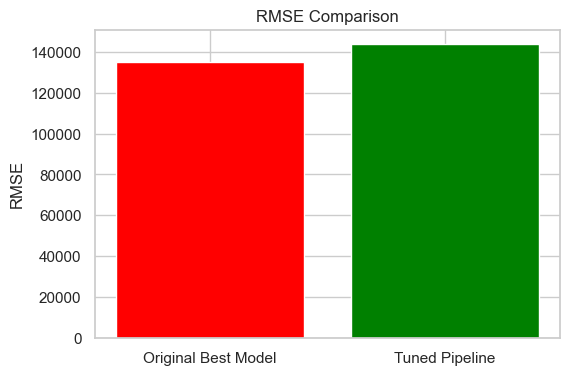

In [304]:
original_rmse = 135000
improvement = ((original_rmse - rmse) / original_rmse) * 100

comparison_df = pd.DataFrame({
    "Model": ["Original Best Model", "Tuned Pipeline"],
    "RMSE": [original_rmse, rmse]
})

print("\nPerformance Comparison:")
print(comparison_df)
print(f"\nPercentage Improvement: {improvement:.2f}%")

# Plot comparison
plt.figure(figsize=(6,4))
plt.bar(comparison_df["Model"], comparison_df["RMSE"], color=["red", "green"])
plt.ylabel("RMSE")
plt.title("RMSE Comparison")
plt.show()

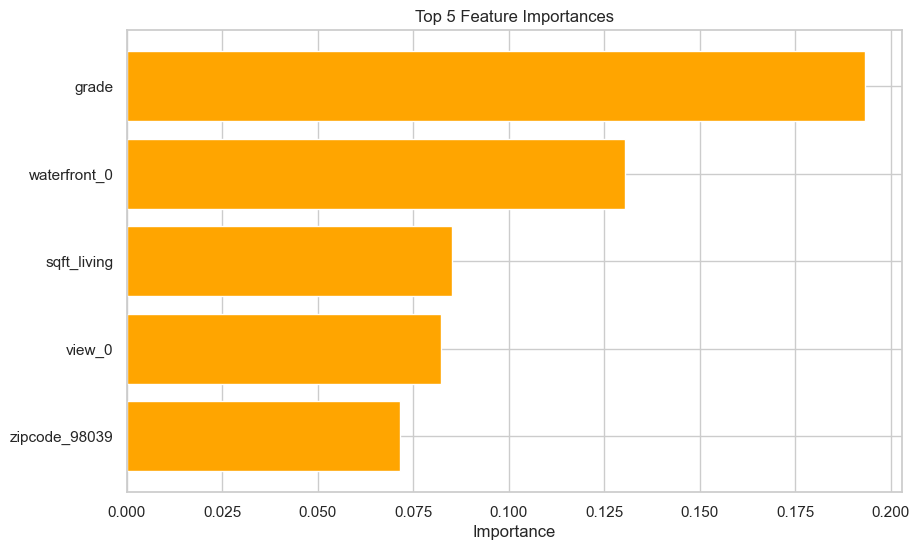

In [302]:
regressor = best_model.named_steps['regressor']

if hasattr(regressor, "feature_importances_"):
    feature_names = []
    
    feature_names.extend(n_features)
    
    ohe = best_model.named_steps['preprocessor'].named_transformers_['c'].named_steps['onehot']
    cat_features = ohe.get_feature_names_out(c_features)
    feature_names.extend(cat_features)
    
    feature_names.extend(p_features)
    
    importances = regressor.feature_importances_
    fi_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False).head(5)
    
    plt.figure(figsize=(10,6))
    plt.barh(fi_df["Feature"], fi_df["Importance"], color="orange")
    plt.xlabel("Importance")
    plt.title("Top 5 Feature Importances")
    plt.gca().invert_yaxis()
    plt.show()

Grade: This is a big one. Think of it as a house's overall quality score, covering everything from its construction and design to its materials. A home's grade is a huge factor in its value, so it's no surprise that it landed at the top.

waterfront_0: This might look a little technical, but it’s actually an engineered feature that simply tells us if a house is not on the waterfront. This is a powerful predictor because having a waterfront view adds incredible value to a property. The absence of a waterfront—represented by this feature—is a clear way to separate those super-premium homes from the rest.

sqft_living: This one is pretty straightforward. It's the total square footage of a house's living space. The size of a home is a fundamental part of its value, so this feature's high importance is exactly what you'd expect.

view_0: Just like waterfront_0, this is another engineered feature that indicates a house has no view. A great view can add a ton of value, so if a house lacks one, this feature acts as a strong signal to the model, helping it make a more accurate prediction.

zipcode_98039: This feature tells the model if a house is located in the 98039 zip code. This zip code corresponds to Medina, Washington—a famously wealthy area. Because location is everything in real estate, being in this specific high-end zip code makes a home's value skyrocket, making this an extremely important feature for your model.

Were Any of These Engineered?
Yes, three of your top five features were engineered! waterfront_0, view_0, and zipcode_98039 were all created from the original data. This is a perfect example of how feature engineering can give your model a significant boost, helping it understand complex, non-linear relationships that the raw data might not reveal.